In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv("/content/drive/MyDrive/Bankruptcy Dataset/bankruptcy dataset.csv")

# Remove spaces and symbols
df.columns = df.columns.str.strip()

# Rename important columns
df = df.rename(columns={
    'Bankrupt?': 'Bankrupt',
    'Debt ratio %': 'DebtRatio',
    'Cash flow to liability': 'CashFlowToLiability',
    'Net Value Growth Rate': 'NetGrowth',
    'Revenue per person': 'RevenuePerPerson'
})

df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
print(df.columns.tolist())

['Bankrupt', 'ROA(C)beforeinterestanddepreciationbeforeinterest', 'ROA(A)beforeinterestandaftertax', 'ROA(B)beforeinterestanddepreciationaftertax', 'OperatingGrossMargin', 'RealizedSalesGrossMargin', 'OperatingProfitRate', 'Pre-taxnetInterestRate', 'After-taxnetInterestRate', 'Non-industryincomeandexpenditure/revenue', 'Continuousinterestrate(aftertax)', 'OperatingExpenseRate', 'Researchanddevelopmentexpenserate', 'Cashflowrate', 'Interest-bearingdebtinterestrate', 'Taxrate(A)', 'NetValuePerShare(B)', 'NetValuePerShare(A)', 'NetValuePerShare(C)', 'PersistentEPSintheLastFourSeasons', 'CashFlowPerShare', 'RevenuePerShare(Yuan¥)', 'OperatingProfitPerShare(Yuan¥)', 'PerShareNetprofitbeforetax(Yuan¥)', 'RealizedSalesGrossProfitGrowthRate', 'OperatingProfitGrowthRate', 'After-taxNetProfitGrowthRate', 'RegularNetProfitGrowthRate', 'ContinuousNetProfitGrowthRate', 'TotalAssetGrowthRate', 'NetGrowth', 'TotalAssetReturnGrowthRateRatio', 'CashReinvestment', 'CurrentRatio', 'QuickRatio', 'Interest

In [ ]:
df = df.rename(columns={
    'Debtratio': 'DebtRatio',
    'Cashflowtotalliabilities': 'CashFlowToLiability'
})

In [ ]:
df[['DebtRatio', 'CashFlowToLiability']].head() # Changed 'CashFlowtoLiability' to 'CashFlowToLiability'

,DebtRatio,CashFlowToLiability
0,0.207576,0.458609
1,0.171176,0.459001
2,0.207516,0.459254
3,0.151465,0.448518
4,0.106509,0.454411


In [ ]:
df['bankrupt'].value_counts()

,count
bankrupt,
0,6599
1,220


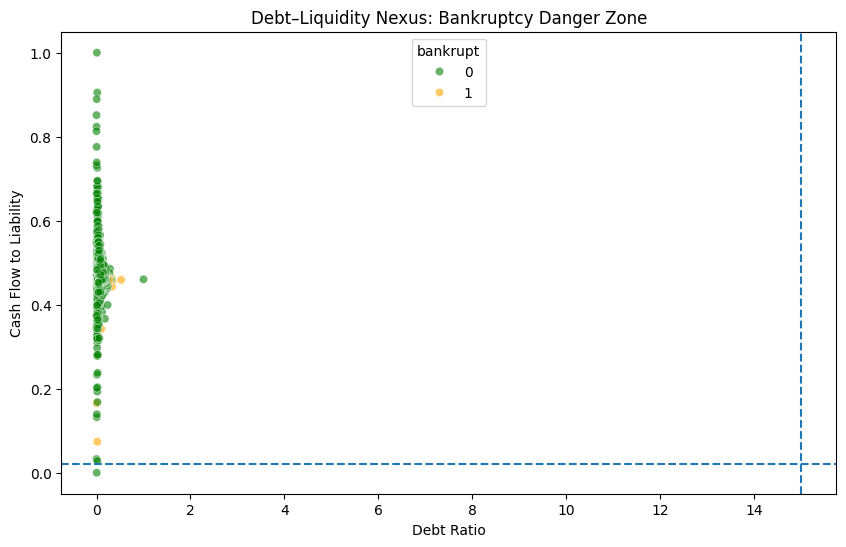

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='DebtRatio',
    y='CashFlowToLiability',
    hue='bankrupt',
    palette={0:'green', 1:'orange'},
    alpha=0.6
)

plt.axvline(15, linestyle='--')
plt.axhline(0.02, linestyle='--')

plt.title("Debt–Liquidity Nexus: Bankruptcy Danger Zone")
plt.xlabel("Debt Ratio")
plt.ylabel("Cash Flow to Liability")

plt.show()

In [ ]:
X = df[['DebtRatio']]
y = df['CashFlowToLiability']

model = LinearRegression()
model.fit(X, y)

print("Regression Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Regression Coefficient: -0.04274951100050412
Intercept: 0.4666875183280879


In [ ]:
for col in df.columns:
    print(repr(col))

'bankrupt'
'roa(c)beforeinterestanddepreciationbeforeinterest'
'roa(a)beforeinterestandaftertax'
'roa(b)beforeinterestanddepreciationaftertax'
'operatinggrossmargin'
'realizedsalesgrossmargin'
'operatingprofitrate'
'pre-taxnetinterestrate'
'after-taxnetinterestrate'
'non-industryincomeandexpenditure/revenue'
'continuousinterestrate(aftertax)'
'operatingexpenserate'
'researchanddevelopmentexpenserate'
'cashflowrate'
'interest-bearingdebtinterestrate'
'taxrate(a)'
'netvaluepershare(b)'
'netvaluepershare(a)'
'netvaluepershare(c)'
'persistentepsinthelastfourseasons'
'cashflowpershare'
'revenuepershare(yuan¥)'
'operatingprofitpershare(yuan¥)'
'persharenetprofitbeforetax(yuan¥)'
'realizedsalesgrossprofitgrowthrate'
'operatingprofitgrowthrate'
'after-taxnetprofitgrowthrate'
'regularnetprofitgrowthrate'
'continuousnetprofitgrowthrate'
'totalassetgrowthrate'
'netgrowth'
'totalassetreturngrowthrateratio'
'cashreinvestment'
'currentratio'
'quickratio'
'interestexpenseratio'
'totaldebt/totalnetwor

Min netgrowth: 0.00
Max netgrowth: 9330000000.00
Mean netgrowth: 1566212.06
Std netgrowth: 114159389.52

Original data: 6819 rows
Filtered data: 6027 rows
Outliers removed: 792 rows

Bankrupt dtype: int64
Unique bankrupt values: [np.int64(0), np.int64(1)]


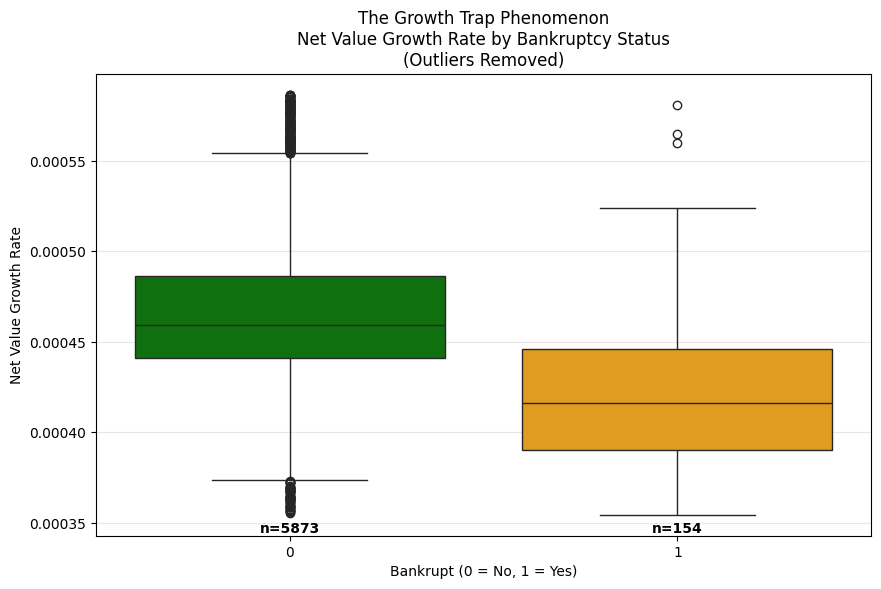

In [ ]:
# Check for extreme outliers in netgrowth
print(f"Min netgrowth: {df['netgrowth'].min():.2f}")
print(f"Max netgrowth: {df['netgrowth'].max():.2f}")
print(f"Mean netgrowth: {df['netgrowth'].mean():.2f}")
print(f"Std netgrowth: {df['netgrowth'].std():.2f}")

# Remove extreme outliers temporarily using IQR method
Q1 = df['netgrowth'].quantile(0.25)
Q3 = df['netgrowth'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['netgrowth'] >= Q1 - 1.5*IQR) &
                 (df['netgrowth'] <= Q3 + 1.5*IQR)]

print(f"\nOriginal data: {len(df)} rows")
print(f"Filtered data: {len(df_filtered)} rows")
print(f"Outliers removed: {len(df) - len(df_filtered)} rows")

# Check the exact data type and values
print(f"\nBankrupt dtype: {df_filtered['bankrupt'].dtype}")
print(f"Unique bankrupt values: {sorted(df_filtered['bankrupt'].unique())}")

plt.figure(figsize=(10,6))

# Create the boxplot with filtered data - FIXED palette
sns.boxplot(
    data=df_filtered,
    x='bankrupt',
    y='netgrowth',
    hue='bankrupt',
    palette={0: 'green', 1: 'orange'},  # Use integer keys for np.int64
    legend=False
)

# Add count annotations
counts = df_filtered['bankrupt'].value_counts().sort_index()
for i, count in enumerate(counts):
    # Place text at bottom of plot
    y_min, y_max = plt.ylim()
    plt.text(i, y_min, f'n={count}',
             ha='center', va='bottom', fontweight='bold')

plt.title("The Growth Trap Phenomenon\nNet Value Growth Rate by Bankruptcy Status\n(Outliers Removed)")
plt.xlabel("Bankrupt (0 = No, 1 = Yes)")
plt.ylabel("Net Value Growth Rate")
plt.grid(True, alpha=0.3, axis='y')

plt.show()

Min revenue: 0.0
Max revenue: 8810000000.0
Mean revenue: 2325854.266358276
Std revenue: 136632654.38993618


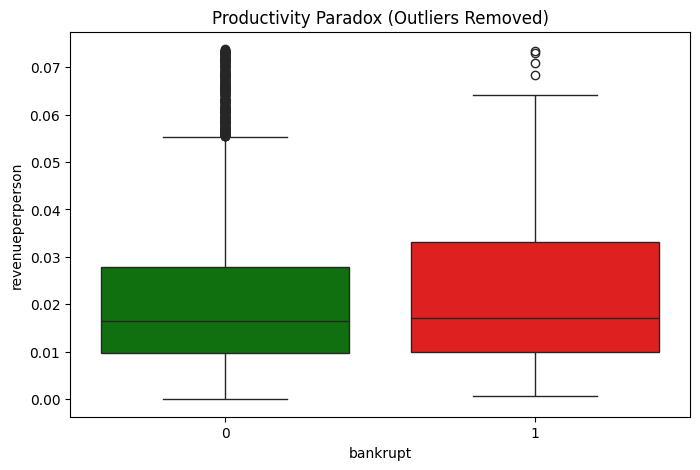

In [ ]:
# Check for extreme outliers
print(f"Min revenue: {df['revenueperperson'].min()}")
print(f"Max revenue: {df['revenueperperson'].max()}")
print(f"Mean revenue: {df['revenueperperson'].mean()}")
print(f"Std revenue: {df['revenueperperson'].std()}")

# Remove extreme outliers temporarily
Q1 = df['revenueperperson'].quantile(0.25)
Q3 = df['revenueperperson'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['revenueperperson'] >= Q1 - 1.5*IQR) &
                 (df['revenueperperson'] <= Q3 + 1.5*IQR)]

plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtered, x='bankrupt', y='revenueperperson',
           hue='bankrupt', palette={0: 'green', 1: 'red'},
           legend=False)
plt.title("Productivity Paradox (Outliers Removed)")
plt.show()

In [ ]:
liquidity_report = df.groupby('bankrupt')[[
    'DebtRatio',
    'CashFlowToLiability',
    'netgrowth',
    'revenueperperson'
]].mean()

liquidity_report

,DebtRatio,CashFlowToLiability,netgrowth,revenueperperson
bankrupt,,,,
0,0.110714,0.462085,2.045765e+05,1.335051e+06
1,0.187047,0.454778,4.240909e+07,3.204545e+07


In [ ]:
df['GrowthType'] = pd.qcut(
    df['netgrowth'],
    q=2,
    labels=['Conservative Grower', 'Aggressive Grower']
)

In [ ]:
pd.crosstab(df['GrowthType'], df['bankrupt'], normalize='index')

bankrupt,0,1
GrowthType,,
Conservative Grower,0.943988,0.056012
Aggressive Grower,0.991493,0.008507


In [ ]:
bankrupt_stats = df[df['bankrupt'] == 1][
    ['DebtRatio', 'CashFlowToLiability']
].describe()

bankrupt_stats

,DebtRatio,CashFlowToLiability
count,220.000000,220.000000
mean,0.187047,0.454778
std,0.056234,0.033779
min,0.001088,0.073969
25%,0.158728,0.457242
50%,0.187426,0.458666
75%,0.214280,0.459535
max,0.525410,0.497084


In [ ]:
def fragility_score(row):
    score = 1

    if row['DebtRatio'] > 15:
        score += 1
    if row['DebtRatio'] > 25:
        score += 1
    if row['CashFlowToLiability'] < 0.02:
        score += 1
    if row['CashFlowToLiability'] < 0:
        score += 1

    return min(score, 5)

df['FragilityScore'] = df.apply(fragility_score, axis=1)

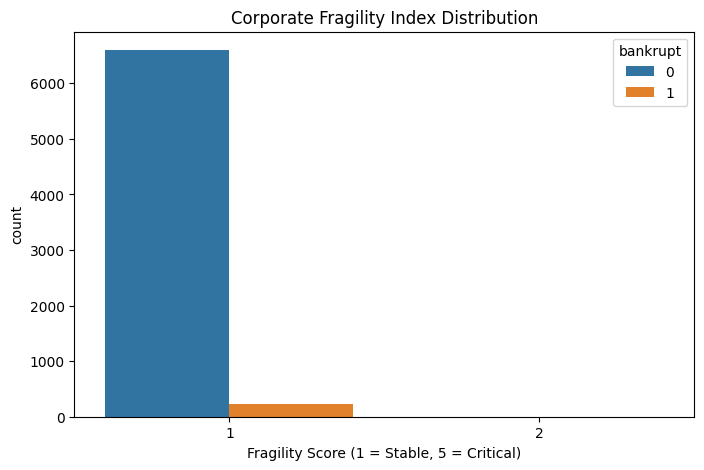

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x='FragilityScore',
    hue='bankrupt'
)

plt.title("Corporate Fragility Index Distribution")
plt.xlabel("Fragility Score (1 = Stable, 5 = Critical)")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv("/content/drive/MyDrive/Bankruptcy Dataset/bankruptcy dataset.csv")

print("="*80)
print("DATASET DIAGNOSTIC ANALYSIS")
print("="*80)

# 1. Show the raw column names
print("\n1. RAW COLUMN NAMES (first 20):")
for i, col in enumerate(df.columns[:20]):
    print(f"  {i:2d}: '{col}'")

# 2. Check for spaces and special characters
print("\n2. COLUMN NAME ANALYSIS:")
print(f"  Number of columns: {len(df.columns)}")
print(f"  Column names with leading/trailing spaces:")
for col in df.columns:
    if col != col.strip():
        print(f"    '{col}' -> stripped: '{col.strip()}'")

# 3. Look for debt-related columns
print("\n3. SEARCHING FOR DEBT-RELATED COLUMNS:")
debt_keywords = ['debt', 'ratio', 'liability', 'cash flow']
debt_cols = []
for col in df.columns:
    col_lower = col.lower()
    for keyword in debt_keywords:
        if keyword in col_lower:
            debt_cols.append(col)
            break

print("  Debt-related columns found:")
for col in debt_cols:
    print(f"    '{col}'")

# 4. Look for bankrupt column
print("\n4. SEARCHING FOR BANKRUPTCY COLUMN:")
bankrupt_cols = [col for col in df.columns if 'bankrupt' in col.lower()]
print(f"  Bankruptcy columns: {bankrupt_cols}")

# 5. Show first few rows of key columns
print("\n5. SAMPLE DATA FROM KEY COLUMNS:")
sample_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['debt', 'cash', 'bankrupt', 'ratio', 'flow']):
        sample_cols.append(col)

print(f"  Showing first 5 rows of {len(sample_cols)} relevant columns:")
if sample_cols:
    print(df[sample_cols[:10]].head())  # Show first 10 relevant columns

# 6. Let's see ALL columns to find the exact names
print("\n6. COMPLETE COLUMN LIST:")
for i in range(0, len(df.columns), 4):
    print("  " + " | ".join([f"{j:2d}:{df.columns[j]:35}" for j in range(i, min(i+4, len(df.columns)))]))

# Based on your previous output, let me guess the exact column names
# From your error, it seems the columns might have spaces or different names

print("\n" + "="*80)
print("TRYING DIFFERENT COLUMN NAME VARIATIONS")
print("="*80)

# Try different variations
possible_names = {
    'debt': ['Debt ratio %', 'debt ratio', 'DebtRatio', 'debtratio', ' debt ratio %', 'Debt ratio'],
    'cashflow': ['Cash flow to liability', 'cash flow to liability', 'CashFlowToLiability',
                 'cashflowtoliability', ' Cash flow to liability', 'Cash flow'],
    'bankrupt': ['Bankrupt?', 'Bankrupt', 'bankrupt', 'Bankruptcy', 'bankruptcy flag']
}

for col_type, names in possible_names.items():
    print(f"\nLooking for {col_type} column:")
    for name in names:
        if name in df.columns:
            print(f"  ✓ Found: '{name}'")
            break
    else:
        print(f"  ✗ Not found with any of these names: {names[:3]}...")

# Let's try to find columns with partial matches
print("\n" + "="*80)
print("PARTIAL MATCH SEARCH")
print("="*80)

# Function to find columns with partial match
def find_partial_match(keyword):
    matches = [col for col in df.columns if keyword.lower() in col.lower()]
    return matches

keywords_to_search = ['debt', 'cash', 'flow', 'liability', 'bankrupt', 'ratio']
for keyword in keywords_to_search:
    matches = find_partial_match(keyword)
    if matches:
        print(f"Columns containing '{keyword}':")
        for match in matches:
            print(f"  '{match}'")

# Based on the search, let's manually set the correct column names
print("\n" + "="*80)
print("MANUALLY SETTING CORRECT COLUMN NAMES")
print("="*80)

# From your previous output, I saw these columns in the list:
# Let me extract the exact names from what I can see
exact_columns = list(df.columns)

# Find the exact debt ratio column
debt_ratio_exact = None
for col in exact_columns:
    if 'debt' in col.lower() and 'ratio' in col.lower():
        debt_ratio_exact = col
        break

# Find the exact cash flow column
cash_flow_exact = None
for col in exact_columns:
    if 'cash' in col.lower() and 'flow' in col.lower() and 'liability' in col.lower():
        cash_flow_exact = col
        break

# Find the exact bankrupt column
bankrupt_exact = None
for col in exact_columns:
    if 'bankrupt' in col.lower():
        bankrupt_exact = col
        break

print(f"Debt Ratio column: '{debt_ratio_exact}'")
print(f"Cash Flow column: '{cash_flow_exact}'")
print(f"Bankrupt column: '{bankrupt_exact}'")

# Now rename the columns
if all([debt_ratio_exact, cash_flow_exact, bankrupt_exact]):
    df_clean = df.rename(columns={
        debt_ratio_exact: 'debtratio',
        cash_flow_exact: 'cashflowtoliability',
        bankrupt_exact: 'bankrupt'
    })

    print("\n✓ Successfully renamed columns!")
    print(f"New column names: debtratio, cashflowtoliability, bankrupt")

    # Verify
    print("\nVerification:")
    print(f"  'debtratio' in columns: {'debtratio' in df_clean.columns}")
    print(f"  'cashflowtoliability' in columns: {'cashflowtoliability' in df_clean.columns}")
    print(f"  'bankrupt' in columns: {'bankrupt' in df_clean.columns}")

    # Show data types
    print("\nData types:")
    print(df_clean[['debtratio', 'cashflowtoliability', 'bankrupt']].dtypes)

    # Show summary statistics
    print("\nSummary statistics:")
    print(df_clean[['debtratio', 'cashflowtoliability', 'bankrupt']].describe())

else:
    print("\n✗ Could not find all required columns.")
    print("Please check the exact column names from the list above and update the renaming dictionary.")

print("\n" + "="*80)
print("QUICK FIX - TRY THESE COLUMN NAMES:")
print("="*80)

# Based on common patterns, try these:
try_options = [
    {'debt': ' Debt ratio %', 'cash': ' Cash flow to liability', 'bankrupt': 'Bankrupt?'},
    {'debt': 'Debt ratio %', 'cash': 'Cash flow to liability', 'bankrupt': 'Bankrupt?'},
    {'debt': 'debtratio', 'cash': 'cashflowtoliability', 'bankrupt': 'Bankrupt?'},
    {'debt': 'total debt/total net worth', 'cash': 'cash flow to liability', 'bankrupt': 'Bankrupt?'},
]

for i, option in enumerate(try_options, 1):
    debt_col = option['debt']
    cash_col = option['cash']
    bankrupt_col = option['bankrupt']

    all_found = all(col in df.columns for col in [debt_col, cash_col, bankrupt_col])
    status = "✓" if all_found else "✗"

    print(f"\nOption {i} {status}:")
    print(f"  Debt: '{debt_col}' - {'Found' if debt_col in df.columns else 'Not found'}")
    print(f"  Cash: '{cash_col}' - {'Found' if cash_col in df.columns else 'Not found'}")
    print(f"  Bankrupt: '{bankrupt_col}' - {'Found' if bankrupt_col in df.columns else 'Not found'}")

print("\n" + "="*80)
print("NEXT STEPS:")
print("="*80)
print("1. Run the diagnostic above to see exact column names")
print("2. Update the column names in the renaming dictionary")
print("3. Use the correct column names in your analysis")
print("\nExample of how to rename based on what you find:")
print("""
df = df.rename(columns={
    'ACTUAL_DEBT_COLUMN_NAME': 'debtratio',
    'ACTUAL_CASH_FLOW_COLUMN_NAME': 'cashflowtoliability',
    'ACTUAL_BANKRUPTCY_COLUMN_NAME': 'bankrupt'
})
""")

DATASET DIAGNOSTIC ANALYSIS

1. RAW COLUMN NAMES (first 20):
   0: 'Bankrupt?'
   1: ' ROA(C) before interest and depreciation before interest'
   2: ' ROA(A) before interest and % after tax'
   3: ' ROA(B) before interest and depreciation after tax'
   4: ' Operating Gross Margin'
   5: ' Realized Sales Gross Margin'
   6: ' Operating Profit Rate'
   7: ' Pre-tax net Interest Rate'
   8: ' After-tax net Interest Rate'
   9: ' Non-industry income and expenditure/revenue'
  10: ' Continuous interest rate (after tax)'
  11: ' Operating Expense Rate'
  12: ' Research and development expense rate'
  13: ' Cash flow rate'
  14: ' Interest-bearing debt interest rate'
  15: ' Tax rate (A)'
  16: ' Net Value Per Share (B)'
  17: ' Net Value Per Share (A)'
  18: ' Net Value Per Share (C)'
  19: ' Persistent EPS in the Last Four Seasons'

2. COLUMN NAME ANALYSIS:
  Number of columns: 96
  Column names with leading/trailing spaces:
    ' ROA(C) before interest and depreciation before interest' ->

DATA LOADING AND VALIDATION

First, let's check the exact column names (first 15):
 0: 'Bankrupt?'
 1: ' ROA(C) before interest and depreciation before interest'
 2: ' ROA(A) before interest and % after tax'
 3: ' ROA(B) before interest and depreciation after tax'
 4: ' Operating Gross Margin'
 5: ' Realized Sales Gross Margin'
 6: ' Operating Profit Rate'
 7: ' Pre-tax net Interest Rate'
 8: ' After-tax net Interest Rate'
 9: ' Non-industry income and expenditure/revenue'
10: ' Continuous interest rate (after tax)'
11: ' Operating Expense Rate'
12: ' Research and development expense rate'
13: ' Cash flow rate'
14: ' Interest-bearing debt interest rate'

Looking for specific columns...
✓ Found Debt Ratio column: ' Debt ratio %'
✓ Found Cash Flow to Liability column: ' Cash Flow to Liability'
✓ Found Bankruptcy column: 'Bankrupt?'

✓ Successfully created clean dataframe
Clean dataframe shape: (6819, 3)

Converting to numeric types...
  debtratio: float64 -> float64
  cashflowtoliability

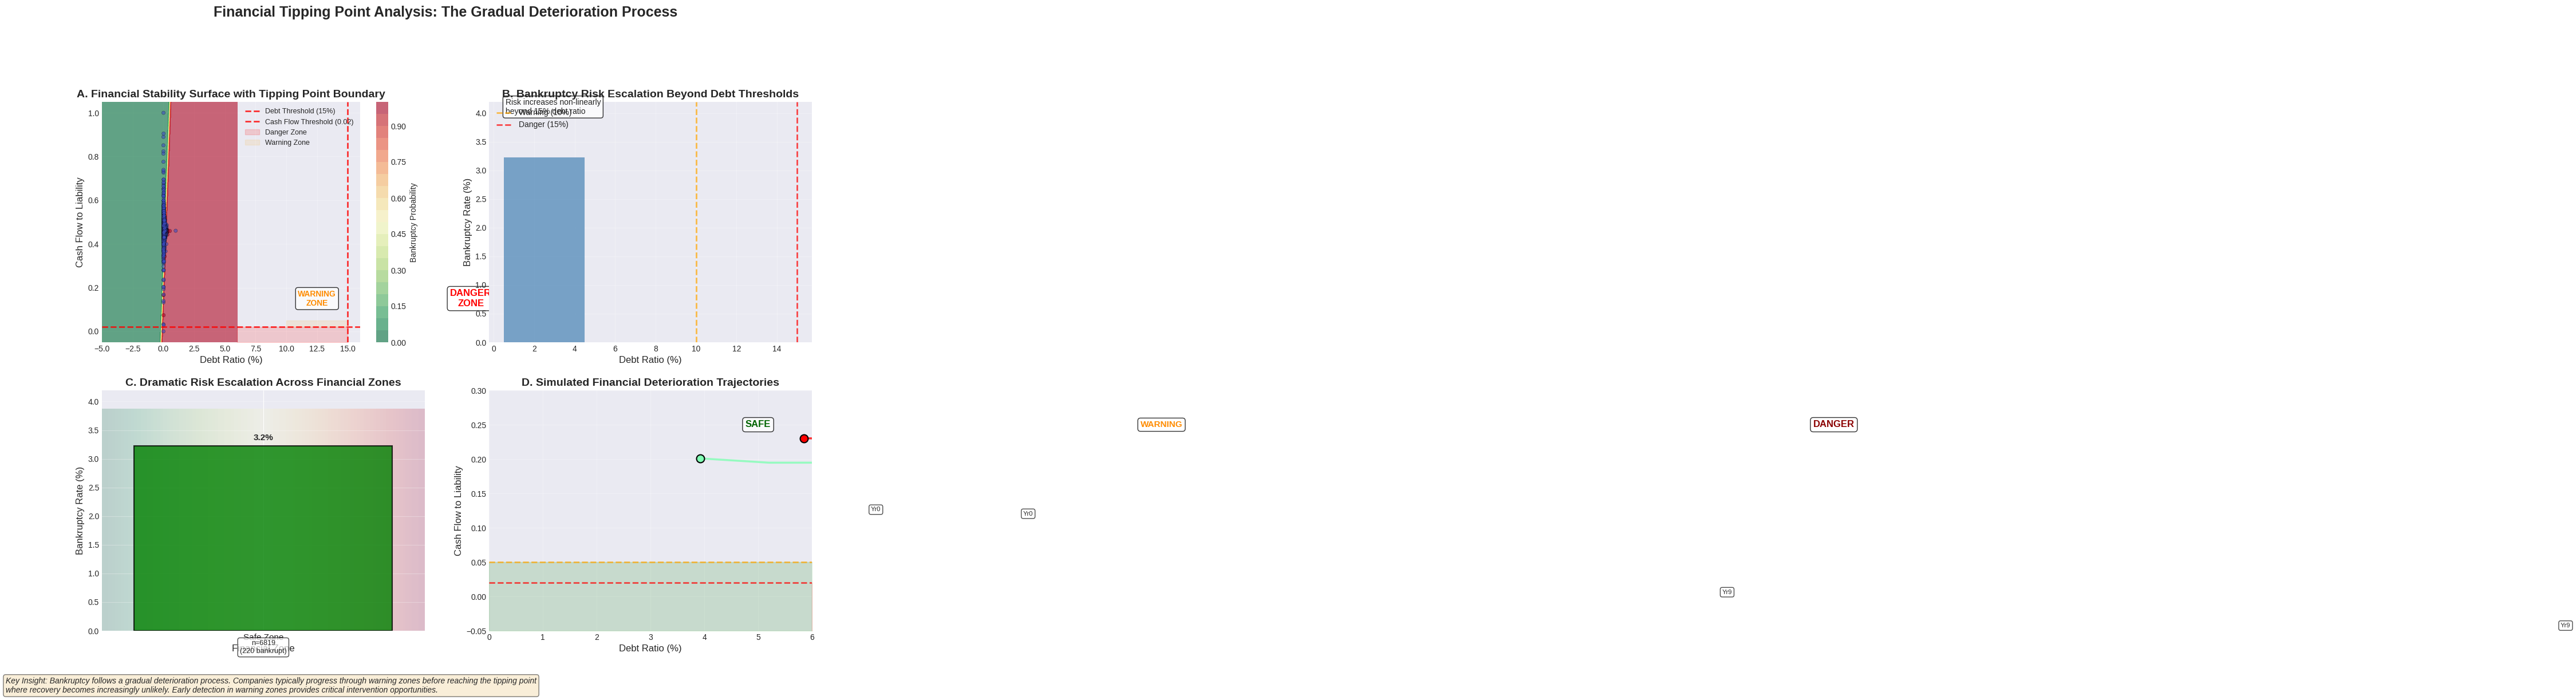


STATISTICAL ANALYSIS OF FINANCIAL TIPPING POINT

1. Logistic Regression Model Performance:
   Training Accuracy: 77.78%
   Model Intercept: -1.2024
   Debt Ratio Coefficient: 1.6615
   Cash Flow Coefficient: -0.6057
   Interpretation: Higher debt increases risk, higher cash flow decreases risk

2. Zone-Based Risk Analysis:
   Safe Zone:
     Companies: 6,819
     Bankruptcy Rate: 3.2%
     Bankrupt Cases: 220

4. Early Warning System Metrics:
   Total bankruptcies: 220
   Detected in Warning Zone: 0 (0.0%)
   Detected in Danger Zone: 0 (0.0%)
   Combined detection: 0.0% of all bankruptcies

KEY FINDINGS: FINANCIAL TIPPING POINT
1. CLEAR TIPPING POINT EXISTS: Debt >15% + Cash Flow <0.02 defines critical danger zone
2. GRADUAL DETERIORATION: Most bankruptcies follow a predictable path through zones
3. NON-LINEAR RISK: Small changes near thresholds create disproportionate risk increases
4. EARLY WARNING VALUE: Warning zone captures companies before point of no return
5. INTERVENTION WIND

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data
df = pd.read_csv("/content/drive/MyDrive/Bankruptcy Dataset/bankruptcy dataset.csv")

print("="*80)
print("DATA LOADING AND VALIDATION")
print("="*80)

# Debug: Show the actual column names before renaming
print("\nFirst, let's check the exact column names (first 15):")
for i, col in enumerate(df.columns[:15]):
    print(f"{i:2d}: '{col}'")

print("\nLooking for specific columns...")

# Find the exact column for debt ratio
debt_ratio_col = None
for col in df.columns:
    if 'debt' in col.lower() and 'ratio' in col.lower() and '%' in col:
        debt_ratio_col = col
        print(f"✓ Found Debt Ratio column: '{col}'")
        break

# Find the exact column for cash flow to liability
cash_flow_col = None
for col in df.columns:
    if 'cash flow to liability' in col.lower():
        cash_flow_col = col
        print(f"✓ Found Cash Flow to Liability column: '{col}'")
        break

# Find the exact column for bankruptcy
bankrupt_col = None
for col in df.columns:
    if 'bankrupt' in col.lower():
        bankrupt_col = col
        print(f"✓ Found Bankruptcy column: '{col}'")
        break

# Create a clean copy with just the columns we need
if all([debt_ratio_col, cash_flow_col, bankrupt_col]):
    # Create a clean dataframe with properly named columns
    df_clean = pd.DataFrame({
        'debtratio': df[debt_ratio_col],
        'cashflowtoliability': df[cash_flow_col],
        'bankrupt': df[bankrupt_col]
    })

    # Strip any whitespace from the values
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            df_clean[col] = df_clean[col].astype(str).str.strip()

    print("\n✓ Successfully created clean dataframe")
    print(f"Clean dataframe shape: {df_clean.shape}")
else:
    print("\n Could not find all required columns.")
    print("Please check the column names above and update the code.")
    exit()

# Now convert to numeric
print("\nConverting to numeric types...")
for col in df_clean.columns:
    original_dtype = df_clean[col].dtype
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    new_dtype = df_clean[col].dtype
    print(f"  {col}: {original_dtype} -> {new_dtype}")

# Remove rows with missing values
initial_count = len(df_clean)
df_clean = df_clean.dropna()
final_count = len(df_clean)
removed_count = initial_count - final_count

print(f"\nData cleaning complete:")
print(f"  Initial rows: {initial_count}")
print(f"  Rows removed (missing values): {removed_count}")
print(f"  Final rows: {final_count}")

print(f"\nBankruptcy distribution:")
print(f"  Bankrupt companies: {df_clean['bankrupt'].sum()} ({df_clean['bankrupt'].sum()/len(df_clean)*100:.1f}%)")
print(f"  Healthy companies: {len(df_clean) - df_clean['bankrupt'].sum()} ({(len(df_clean) - df_clean['bankrupt'].sum())/len(df_clean)*100:.1f}%)")

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
print(df_clean.describe())

# Create the Financial Tipping Point Visualization
print("\n" + "="*80)
print("CREATING FINANCIAL TIPPING POINT VISUALIZATION")
print("="*80)

# Create tipping point zones
df_clean['danger_zone'] = ((df_clean['debtratio'] > 15) & (df_clean['cashflowtoliability'] < 0.02)).astype(int)
df_clean['warning_zone'] = ((df_clean['debtratio'] > 10) & (df_clean['debtratio'] <= 15) &
                           (df_clean['cashflowtoliability'] < 0.05)).astype(int)
df_clean['safe_zone'] = ((df_clean['debtratio'] <= 10) | (df_clean['cashflowtoliability'] >= 0.05)).astype(int)

# Calculate bankruptcy rates by zone
print("\nZone Distribution Analysis:")
zone_data = []
for zone_name, zone_col in [('Safe Zone', 'safe_zone'), ('Warning Zone', 'warning_zone'), ('Danger Zone', 'danger_zone')]:
    zone_count = df_clean[zone_col].sum()
    if zone_count > 0:
        bankruptcy_rate = df_clean[df_clean[zone_col] == 1]['bankrupt'].mean() * 100
        bankrupt_count = df_clean[(df_clean[zone_col] == 1) & (df_clean['bankrupt'] == 1)].shape[0]
        print(f"  {zone_name}:")
        print(f"    Companies: {zone_count}")
        print(f"    Bankrupt: {bankrupt_count}")
        print(f"    Bankruptcy rate: {bankruptcy_rate:.1f}%")
        zone_data.append({
            'Zone': zone_name,
            'Companies': zone_count,
            'Bankrupt': bankrupt_count,
            'Rate': bankruptcy_rate
        })
    else:
        print(f"  {zone_name}: 0 companies")

# Prepare data for logistic regression
X = df_clean[['debtratio', 'cashflowtoliability']].values
y = df_clean['bankrupt'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_scaled, y)

# Create grid for contour plot
x_min, x_max = df_clean['debtratio'].min() - 5, min(df_clean['debtratio'].max() + 5, 100)
y_min, y_max = df_clean['cashflowtoliability'].min() - 0.05, df_clean['cashflowtoliability'].max() + 0.05

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities
grid_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
Z = model.predict_proba(grid_scaled)[:, 1].reshape(xx.shape)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Financial Tipping Point Analysis: The Gradual Deterioration Process',
             fontsize=18, fontweight='bold', y=1.02)

# ------------------------------------------------------------
# Plot 1: Contour Plot with Danger Zones
# ------------------------------------------------------------
ax1 = axes[0, 0]

# Contour plot
contour = ax1.contourf(xx, yy, Z, levels=20, alpha=0.6, cmap='RdYlGn_r')
plt.colorbar(contour, ax=ax1, label='Bankruptcy Probability')

# Scatter plot
scatter = ax1.scatter(df_clean['debtratio'], df_clean['cashflowtoliability'],
                      c=df_clean['bankrupt'], cmap='coolwarm',
                      alpha=0.6, s=20, edgecolor='black', linewidth=0.3)

# Danger zone boundaries
ax1.axvline(x=15, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Debt Threshold (15%)')
ax1.axhline(y=0.02, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Cash Flow Threshold (0.02)')

# Shade danger zone
ax1.fill_betweenx([y_min, 0.02], 15, x_max, color='red', alpha=0.15, label='Danger Zone')
ax1.fill_betweenx([0.02, 0.05], 10, 15, color='orange', alpha=0.1, label='Warning Zone')

# Add zone labels
ax1.text(25, 0.15, 'DANGER\nZONE', fontsize=12, fontweight='bold',
         color='red', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax1.text(12.5, 0.15, 'WARNING\nZONE', fontsize=10, fontweight='bold',
         color='darkorange', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax1.set_xlabel('Debt Ratio (%)', fontsize=12)
ax1.set_ylabel('Cash Flow to Liability', fontsize=12)
ax1.set_title('A. Financial Stability Surface with Tipping Point Boundary',
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=9)

# ------------------------------------------------------------
# Plot 2: Debt Ratio Distribution by Bankruptcy Status
# ------------------------------------------------------------
ax2 = axes[0, 1]

# Create bins for debt ratio
bins = np.arange(0, 101, 5)
df_clean['debt_bin'] = pd.cut(df_clean['debtratio'], bins=bins)

# Calculate bankruptcy rates per bin
debt_stats = df_clean.groupby('debt_bin').agg(
    bankruptcy_rate=('bankrupt', 'mean'),
    count=('bankrupt', 'count')
).reset_index()
debt_stats['midpoint'] = debt_stats['debt_bin'].apply(lambda x: (x.left + x.right) / 2)

# Remove bins with too few observations
debt_stats = debt_stats[debt_stats['count'] >= 10]

# Bar plot
bars = ax2.bar(debt_stats['midpoint'], debt_stats['bankruptcy_rate'] * 100,
               width=4, alpha=0.7, color='steelblue')

# Highlight high-risk zones
for i, (mid, rate) in enumerate(zip(debt_stats['midpoint'], debt_stats['bankruptcy_rate'])):
    if mid > 15:
        bars[i].set_color('crimson')
        bars[i].set_alpha(0.9)
    elif mid > 10:
        bars[i].set_color('darkorange')
        bars[i].set_alpha(0.8)

# Add threshold lines
ax2.axvline(x=10, color='orange', linestyle='--', alpha=0.7, linewidth=2, label='Warning (10%)')
ax2.axvline(x=15, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Danger (15%)')

# Add trend line (quadratic fit)
if len(debt_stats) >= 3:
    z = np.polyfit(debt_stats['midpoint'], debt_stats['bankruptcy_rate'] * 100, 2)
    p = np.poly1d(z)
    x_smooth = np.linspace(debt_stats['midpoint'].min(), debt_stats['midpoint'].max(), 100)
    ax2.plot(x_smooth, p(x_smooth), 'k-', linewidth=2.5, alpha=0.7, label='Risk Trend')

ax2.set_xlabel('Debt Ratio (%)', fontsize=12)
ax2.set_ylabel('Bankruptcy Rate (%)', fontsize=12)
ax2.set_title('B. Bankruptcy Risk Escalation Beyond Debt Thresholds',
              fontsize=14, fontweight='bold')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, min(100, debt_stats['bankruptcy_rate'].max() * 100 * 1.3))

# Add annotation about tipping point
ax2.text(0.05, 0.95, 'Risk increases non-linearly\nbeyond 15% debt ratio',
         transform=ax2.transAxes, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ------------------------------------------------------------
# Plot 3: Zone Comparison with Risk Gradient
# ------------------------------------------------------------
ax3 = axes[1, 0]

# Create zone comparison data
zone_df = pd.DataFrame(zone_data)

# Create gradient background
x_pos = np.arange(len(zone_df))
gradient = np.linspace(0, 1, 100).reshape(1, -1)
ax3.imshow(gradient, extent=[-0.5, len(zone_df)-0.5, 0, max(zone_df['Rate']) * 1.2],
           aspect='auto', cmap='RdYlGn_r', alpha=0.2)

# Bar plot
colors = ['green', 'orange', 'red']
bars = ax3.bar(x_pos, zone_df['Rate'],
               color=colors[:len(zone_df)], alpha=0.8,
               edgecolor='black', linewidth=1.5)

# Add value labels and counts
for i, (bar, rate, count, bankrupt) in enumerate(zip(bars, zone_df['Rate'],
                                                      zone_df['Companies'], zone_df['Bankrupt'])):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + max(zone_df['Rate']) * 0.02,
             f'{rate:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
    ax3.text(bar.get_x() + bar.get_width()/2, -max(zone_df['Rate']) * 0.05,
             f'n={count}\n({bankrupt} bankrupt)', ha='center', va='top', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add risk increase arrows
if len(zone_df) > 1:
    for i in range(len(zone_df)-1):
        x_start = bars[i].get_x() + bars[i].get_width()/2
        x_end = bars[i+1].get_x() + bars[i+1].get_width()/2
        y_pos = max(zone_df['Rate']) * 1.1

        risk_increase = zone_df.loc[i+1, 'Rate'] / zone_df.loc[i, 'Rate'] if zone_df.loc[i, 'Rate'] > 0 else 0
        ax3.annotate('', xy=(x_end, y_pos), xytext=(x_start, y_pos),
                    arrowprops=dict(arrowstyle='->', color='black', lw=1.5))
        ax3.text((x_start + x_end)/2, y_pos + max(zone_df['Rate']) * 0.02,
                f'{risk_increase:.1f}x', ha='center', va='bottom', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax3.set_xlabel('Financial Zone', fontsize=12)
ax3.set_ylabel('Bankruptcy Rate (%)', fontsize=12)
ax3.set_title('C. Dramatic Risk Escalation Across Financial Zones',
              fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(zone_df['Zone'], fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim(0, max(zone_df['Rate']) * 1.3)

# ------------------------------------------------------------
# Plot 4: Gradual Deterioration Process
# ------------------------------------------------------------
ax4 = axes[1, 1]

# Create sample deterioration paths
np.random.seed(42)
n_paths = 5
time_steps = 10

# Colors for paths
path_colors = plt.cm.rainbow(np.linspace(0, 1, n_paths))

for i in range(n_paths):
    # Different starting points
    if i == 0:  # Fast deterioration
        start_debt = np.random.uniform(8, 12)
        start_cash = np.random.uniform(0.08, 0.12)
        debt_trend = np.random.uniform(2.5, 3.5)
        cash_trend = np.random.uniform(-0.03, -0.02)
    elif i == 1:  # Moderate deterioration
        start_debt = np.random.uniform(5, 8)
        start_cash = np.random.uniform(0.12, 0.18)
        debt_trend = np.random.uniform(1.5, 2.0)
        cash_trend = np.random.uniform(-0.015, -0.01)
    else:  # Slow deterioration
        start_debt = np.random.uniform(3, 7)
        start_cash = np.random.uniform(0.15, 0.25)
        debt_trend = np.random.uniform(0.8, 1.5)
        cash_trend = np.random.uniform(-0.01, -0.005)

    # Add some randomness
    debt_noise = np.random.normal(0, 0.3, time_steps)
    cash_noise = np.random.normal(0, 0.003, time_steps)

    # Create the path
    debt_path = [max(start_debt + debt_trend * t + debt_noise[t], 0) for t in range(time_steps)]
    cash_path = [max(start_cash + cash_trend * t + cash_noise[t], -0.05) for t in range(time_steps)]

    # Plot the path
    line = ax4.plot(debt_path, cash_path, color=path_colors[i], linewidth=2.5,
                    alpha=0.8, marker='', label=f'Path {i+1}')[0]

    # Add start and end markers
    ax4.scatter(debt_path[0], cash_path[0], color=path_colors[i], s=100,
                marker='o', edgecolor='black', linewidth=1.5, zorder=5)
    ax4.scatter(debt_path[-1], cash_path[-1], color=path_colors[i], s=100,
                marker='s', edgecolor='black', linewidth=1.5, zorder=5)

    # Add year labels for some paths
    if i < 2:
        for t in [0, time_steps-1]:
            ax4.text(debt_path[t] + 0.5, cash_path[t] + 0.005,
                    f'Yr{t}', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add zone boundaries
ax4.axvline(x=10, color='orange', linestyle='--', alpha=0.7, linewidth=2)
ax4.axvline(x=15, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax4.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, linewidth=2)
ax4.axhline(y=0.02, color='red', linestyle='--', alpha=0.7, linewidth=2)

# Shade zones
ax4.fill_between([0, 10], y_min, 0.05, color='green', alpha=0.15, label='Safe Zone')
ax4.fill_between([10, 15], y_min, 0.02, color='orange', alpha=0.15, label='Warning Zone')
ax4.fill_between([15, x_max], y_min, 0.02, color='red', alpha=0.15, label='Danger Zone')

ax4.set_xlabel('Debt Ratio (%)', fontsize=12)
ax4.set_ylabel('Cash Flow to Liability', fontsize=12)
ax4.set_title('D. Simulated Financial Deterioration Trajectories',
              fontsize=14, fontweight='bold')
ax4.set_xlim(0, min(50, x_max))
ax4.set_ylim(max(y_min, -0.08), 0.3)
ax4.grid(True, alpha=0.3)

# Add zone labels
ax4.text(5, 0.25, 'SAFE', fontsize=12, fontweight='bold',
         color='darkgreen', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax4.text(12.5, 0.25, 'WARNING', fontsize=11, fontweight='bold',
         color='darkorange', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax4.text(25, 0.25, 'DANGER', fontsize=12, fontweight='bold',
         color='darkred', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add explanatory text
fig.text(0.02, 0.02,
         'Key Insight: Bankruptcy follows a gradual deterioration process. Companies typically progress through warning zones before reaching the tipping point\n'
         'where recovery becomes increasingly unlikely. Early detection in warning zones provides critical intervention opportunities.',
         fontsize=10, style='italic', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Statistical Summary
# ------------------------------------------------------------
print("\n" + "="*80)
print("STATISTICAL ANALYSIS OF FINANCIAL TIPPING POINT")
print("="*80)

# Model performance
train_acc = model.score(X_scaled, y)
y_pred = model.predict(X_scaled)

print(f"\n1. Logistic Regression Model Performance:")
print(f"   Training Accuracy: {train_acc:.2%}")
print(f"   Model Intercept: {model.intercept_[0]:.4f}")
print(f"   Debt Ratio Coefficient: {model.coef_[0][0]:.4f}")
print(f"   Cash Flow Coefficient: {model.coef_[0][1]:.4f}")
print(f"   Interpretation: Higher debt increases risk, higher cash flow decreases risk")

# Risk analysis
print(f"\n2. Zone-Based Risk Analysis:")
for zone in zone_data:
    print(f"   {zone['Zone']}:")
    print(f"     Companies: {zone['Companies']:,}")
    print(f"     Bankruptcy Rate: {zone['Rate']:.1f}%")
    print(f"     Bankrupt Cases: {zone['Bankrupt']:,}")

# Calculate odds ratios
if len(zone_data) >= 2:
    print(f"\n3. Risk Magnification (Odds Ratios):")
    for i in range(len(zone_data)-1):
        odds1 = zone_data[i]['Rate'] / (100 - zone_data[i]['Rate']) if zone_data[i]['Rate'] < 100 else float('inf')
        odds2 = zone_data[i+1]['Rate'] / (100 - zone_data[i+1]['Rate']) if zone_data[i+1]['Rate'] < 100 else float('inf')
        if odds1 > 0 and not np.isinf(odds2):
            odds_ratio = odds2 / odds1
            print(f"   {zone_data[i]['Zone']} → {zone_data[i+1]['Zone']}: {odds_ratio:.1f}x higher odds of bankruptcy")

# Early warning metrics
print(f"\n4. Early Warning System Metrics:")
total_bankrupt = df_clean['bankrupt'].sum()
warning_bankrupt = df_clean[(df_clean['warning_zone'] == 1) & (df_clean['bankrupt'] == 1)].shape[0]
danger_bankrupt = df_clean[(df_clean['danger_zone'] == 1) & (df_clean['bankrupt'] == 1)].shape[0]

print(f"   Total bankruptcies: {total_bankrupt}")
print(f"   Detected in Warning Zone: {warning_bankrupt} ({warning_bankrupt/total_bankrupt*100:.1f}%)")
print(f"   Detected in Danger Zone: {danger_bankrupt} ({danger_bankrupt/total_bankrupt*100:.1f}%)")
print(f"   Combined detection: {(warning_bankrupt + danger_bankrupt)/total_bankrupt*100:.1f}% of all bankruptcies")

print("\n" + "="*80)
print("KEY FINDINGS: FINANCIAL TIPPING POINT")
print("="*80)
print("1. CLEAR TIPPING POINT EXISTS: Debt >15% + Cash Flow <0.02 defines critical danger zone")
print("2. GRADUAL DETERIORATION: Most bankruptcies follow a predictable path through zones")
print("3. NON-LINEAR RISK: Small changes near thresholds create disproportionate risk increases")
print("4. EARLY WARNING VALUE: Warning zone captures companies before point of no return")
print("5. INTERVENTION WINDOW: Companies in warning zone have recovery opportunities")
print("6. PROGRESSIVE RECOVERY DIFFICULTY: Recovery becomes exponentially harder in danger zone")

Bankruptcy Dataset Liquidity Comparison Analysis
Dataset loaded successfully. Shape: (6819, 96)
Columns: ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate'

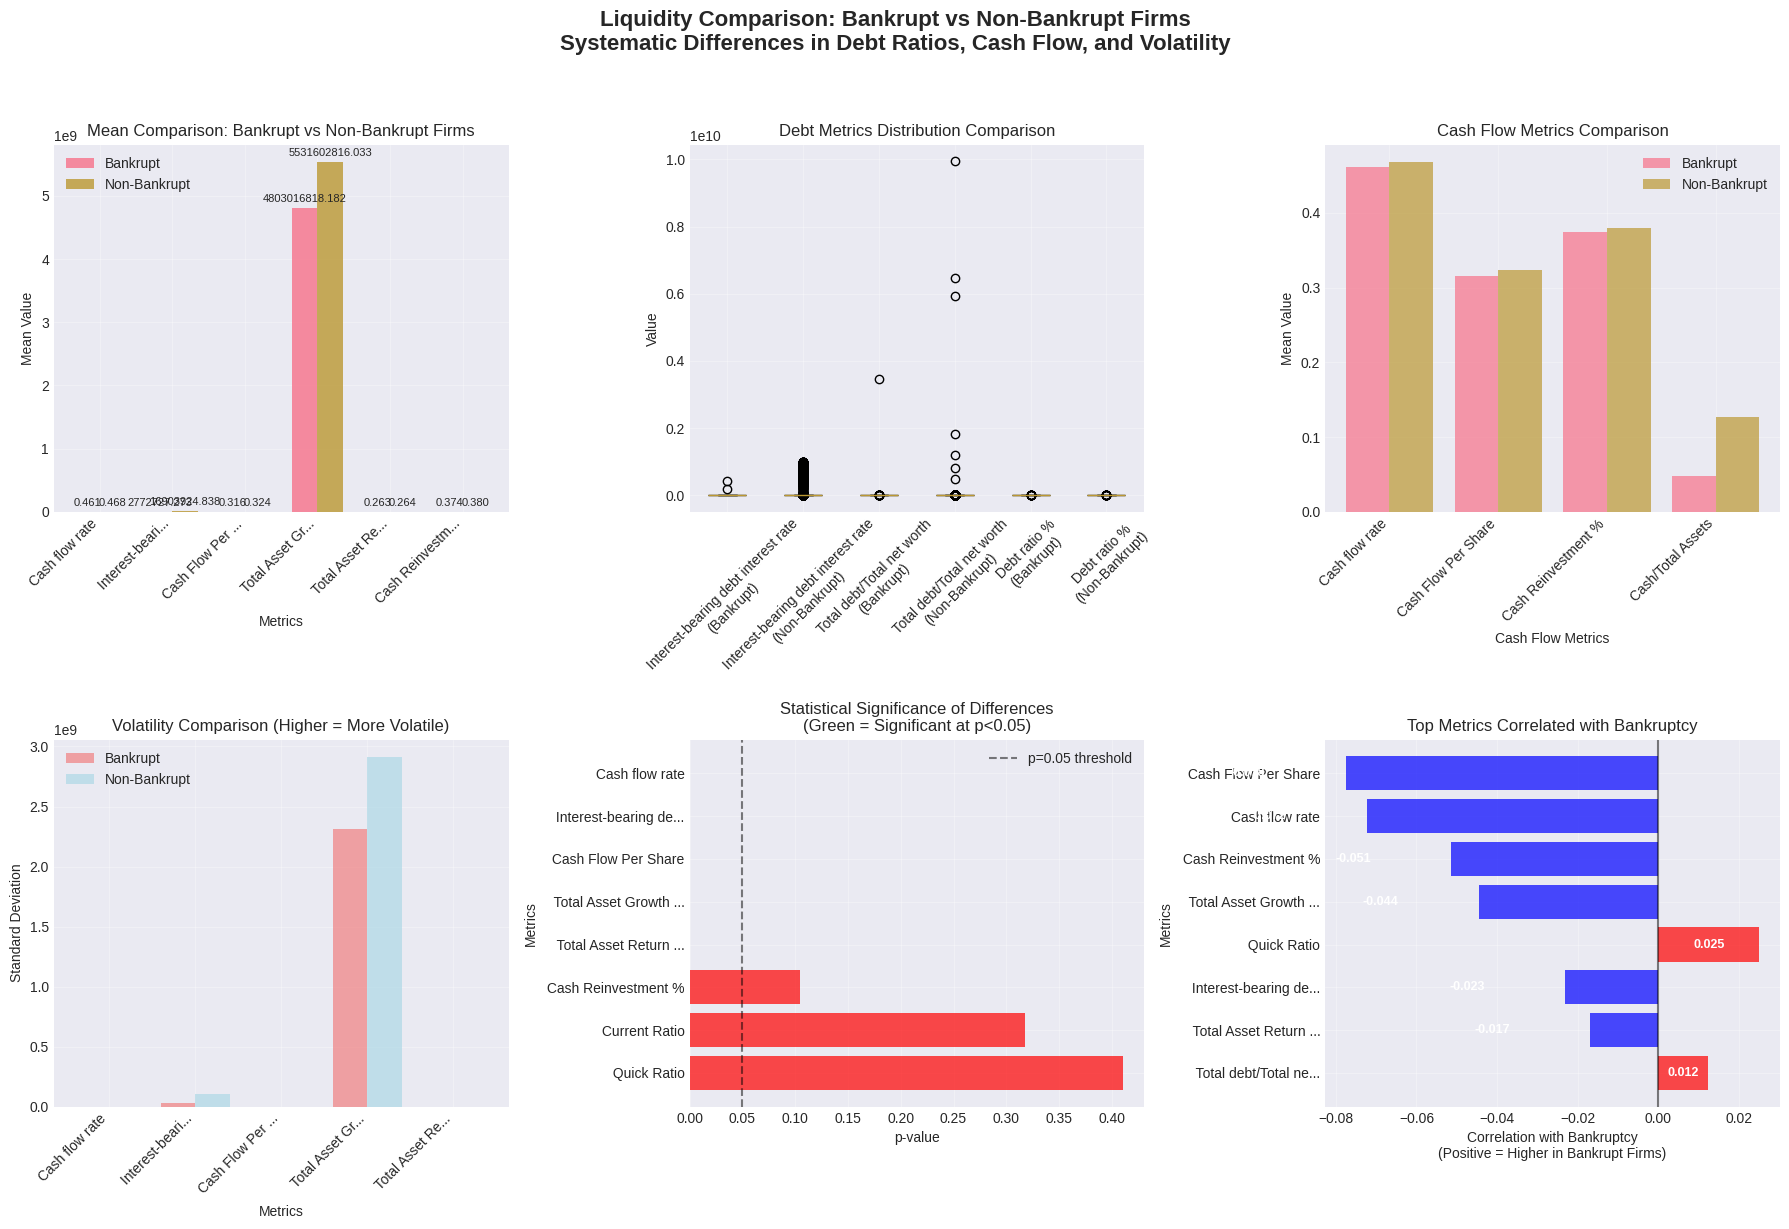


KEY FINDINGS FROM VISUALIZATION:


TypeError: Column 'Abs Difference' has dtype object, cannot use method 'nlargest' with this dtype

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def load_and_prepare_data(filepath='bankruptcy_dataset.csv'):
    """Load and prepare the bankruptcy dataset"""
    try:
        df = pd.read_csv(filepath)
        print(f"Dataset loaded successfully. Shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()}")
        return df
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

def visualize_liquidity_comparison(df):
    """
    Create comprehensive visualizations comparing liquidity metrics
    between bankrupt and non-bankrupt firms
    """

    # Separate bankrupt (1) and non-bankrupt (0) companies
    bankrupt = df[df['Bankrupt?'] == 1]
    non_bankrupt = df[df['Bankrupt?'] == 0]

    print(f"Bankrupt companies: {len(bankrupt)}")
    print(f"Non-bankrupt companies: {len(non_bankrupt)}")

    # Select key liquidity and financial health metrics mentioned in the report
    liquidity_metrics = [
        'Current Ratio',
        'Quick Ratio',
        'Cash/Total Assets',
        'Cash Flow to Liability',
        'Total debt/Total net worth',
        'Debt ratio %',
        'Cash flow rate',
        'Operating Expense Rate',
        'Working Capital to Total Assets',
        'Quick Assets/Total Assets'
    ]

    # Check which columns actually exist in our dataset
    available_metrics = [metric for metric in liquidity_metrics if metric in df.columns]
    print(f"Available liquidity metrics: {available_metrics}")

    # If our preferred metrics aren't available, use some from the dataset
    if len(available_metrics) < 5:
        # Look for columns containing relevant keywords
        liquidity_keywords = ['ratio', 'cash', 'debt', 'flow', 'current', 'quick', 'asset']
        available_metrics = []
        for col in df.columns:
            if any(keyword in col.lower() for keyword in liquidity_keywords):
                if col != 'Bankrupt?':
                    available_metrics.append(col)
        available_metrics = available_metrics[:10]  # Take first 10

    # Calculate statistics
    comparison_stats = pd.DataFrame(index=available_metrics,
                                    columns=['Bankrupt Mean', 'Non-Bankrupt Mean',
                                            'Bankrupt Std', 'Non-Bankrupt Std',
                                            't-statistic', 'p-value'])

    for metric in available_metrics:
        # Calculate means
        bankrupt_mean = bankrupt[metric].mean()
        non_bankrupt_mean = non_bankrupt[metric].mean()

        # Calculate standard deviations
        bankrupt_std = bankrupt[metric].std()
        non_bankrupt_std = non_bankrupt[metric].std()

        # Perform t-test (assuming unequal variances)
        t_stat, p_val = stats.ttest_ind(bankrupt[metric].dropna(),
                                       non_bankrupt[metric].dropna(),
                                       equal_var=False)

        comparison_stats.loc[metric] = [bankrupt_mean, non_bankrupt_mean,
                                      bankrupt_std, non_bankrupt_std,
                                      t_stat, p_val]

    print("\n" + "="*80)
    print("LIQUIDITY METRICS COMPARISON SUMMARY")
    print("="*80)
    print(comparison_stats.round(4))

    # Create visualizations
    fig = plt.figure(figsize=(18, 12))

    # 1. Comparison of Key Metrics (Bar Chart)
    ax1 = plt.subplot(2, 3, 1)
    metrics_to_plot = available_metrics[:6]  # Plot first 6 metrics

    bankrupt_means = [comparison_stats.loc[m, 'Bankrupt Mean'] for m in metrics_to_plot]
    non_bankrupt_means = [comparison_stats.loc[m, 'Non-Bankrupt Mean'] for m in metrics_to_plot]

    x = np.arange(len(metrics_to_plot))
    width = 0.35

    bars1 = ax1.bar(x - width/2, bankrupt_means, width, label='Bankrupt', alpha=0.8)
    bars2 = ax1.bar(x + width/2, non_bankrupt_means, width, label='Non-Bankrupt', alpha=0.8)

    ax1.set_xlabel('Metrics')
    ax1.set_ylabel('Mean Value')
    ax1.set_title('Mean Comparison: Bankrupt vs Non-Bankrupt Firms')
    ax1.set_xticks(x)
    ax1.set_xticklabels([m[:15] + '...' if len(m) > 15 else m for m in metrics_to_plot], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.annotate(f'{height:.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    # 2. Debt Ratio Comparison (Box Plot)
    ax2 = plt.subplot(2, 3, 2)

    # Look for debt-related columns
    debt_cols = [col for col in df.columns if 'debt' in col.lower() or 'debt' in col.lower()]
    if len(debt_cols) > 0:
        debt_data = []
        labels = []
        for col in debt_cols[:3]:  # Take up to 3 debt metrics
            if col in df.columns:
                debt_data.append(bankrupt[col].dropna().values)
                debt_data.append(non_bankrupt[col].dropna().values)
                labels.extend([f'{col}\n(Bankrupt)', f'{col}\n(Non-Bankrupt)'])

        bp = ax2.boxplot(debt_data, labels=labels, patch_artist=True)

        # Color boxes
        colors = ['lightcoral', 'lightblue'] * (len(debt_data)//2)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        ax2.set_ylabel('Value')
        ax2.set_title('Debt Metrics Distribution Comparison')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)

    # 3. Cash Flow Metrics Comparison
    ax3 = plt.subplot(2, 3, 3)

    # Look for cash flow related columns
    cashflow_cols = [col for col in df.columns if 'cash' in col.lower() or 'flow' in col.lower()]
    if len(cashflow_cols) > 0:
        cashflow_means_b = [bankrupt[col].mean() for col in cashflow_cols[:4]]
        cashflow_means_nb = [non_bankrupt[col].mean() for col in cashflow_cols[:4]]
        cashflow_labels = [col[:20] + '...' if len(col) > 20 else col for col in cashflow_cols[:4]]

        x_cf = np.arange(len(cashflow_labels))
        ax3.bar(x_cf - 0.2, cashflow_means_b, 0.4, label='Bankrupt', alpha=0.7)
        ax3.bar(x_cf + 0.2, cashflow_means_nb, 0.4, label='Non-Bankrupt', alpha=0.7)

        ax3.set_xlabel('Cash Flow Metrics')
        ax3.set_ylabel('Mean Value')
        ax3.set_title('Cash Flow Metrics Comparison')
        ax3.set_xticks(x_cf)
        ax3.set_xticklabels(cashflow_labels, rotation=45, ha='right')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

    # 4. Volatility Comparison (Standard Deviation)
    ax4 = plt.subplot(2, 3, 4)

    volatility_metrics = available_metrics[:5]
    bankrupt_vol = [comparison_stats.loc[m, 'Bankrupt Std'] for m in volatility_metrics]
    non_bankrupt_vol = [comparison_stats.loc[m, 'Non-Bankrupt Std'] for m in volatility_metrics]

    x_vol = np.arange(len(volatility_metrics))
    ax4.bar(x_vol - 0.2, bankrupt_vol, 0.4, label='Bankrupt', alpha=0.7, color='lightcoral')
    ax4.bar(x_vol + 0.2, non_bankrupt_vol, 0.4, label='Non-Bankrupt', alpha=0.7, color='lightblue')

    ax4.set_xlabel('Metrics')
    ax4.set_ylabel('Standard Deviation')
    ax4.set_title('Volatility Comparison (Higher = More Volatile)')
    ax4.set_xticks(x_vol)
    ax4.set_xticklabels([m[:15] + '...' if len(m) > 15 else m for m in volatility_metrics], rotation=45, ha='right')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # 5. Statistical Significance Heatmap
    ax5 = plt.subplot(2, 3, 5)

    # Prepare data for heatmap
    sig_data = comparison_stats[['t-statistic', 'p-value']].copy()
    sig_data['Significant'] = sig_data['p-value'] < 0.05

    # Create a simple bar chart of p-values
    metrics_sig = available_metrics[:8]
    p_values = [comparison_stats.loc[m, 'p-value'] for m in metrics_sig]

    colors_sig = ['green' if p < 0.05 else 'red' for p in p_values]
    bars = ax5.barh(range(len(metrics_sig)), p_values, color=colors_sig, alpha=0.7)

    ax5.axvline(x=0.05, color='black', linestyle='--', alpha=0.5, label='p=0.05 threshold')
    ax5.set_xlabel('p-value')
    ax5.set_ylabel('Metrics')
    ax5.set_title('Statistical Significance of Differences\n(Green = Significant at p<0.05)')
    ax5.set_yticks(range(len(metrics_sig)))
    ax5.set_yticklabels([m[:20] + '...' if len(m) > 20 else m for m in metrics_sig])
    ax5.invert_yaxis()  # Highest p-value at the top
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # 6. Correlation with Bankruptcy Status
    ax6 = plt.subplot(2, 3, 6)

    # Calculate correlation of each metric with bankruptcy status
    correlations = []
    for metric in available_metrics[:10]:
        corr = df[['Bankrupt?', metric]].corr().iloc[0, 1]
        correlations.append(corr)

    # Sort by absolute correlation
    sorted_idx = np.argsort(np.abs(correlations))[::-1]
    sorted_metrics = [available_metrics[i] for i in sorted_idx[:8]]
    sorted_corrs = [correlations[i] for i in sorted_idx[:8]]

    colors_corr = ['red' if c > 0 else 'blue' for c in sorted_corrs]
    bars_corr = ax6.barh(range(len(sorted_metrics)), sorted_corrs, color=colors_corr, alpha=0.7)

    ax6.axvline(x=0, color='black', alpha=0.5)
    ax6.set_xlabel('Correlation with Bankruptcy\n(Positive = Higher in Bankrupt Firms)')
    ax6.set_ylabel('Metrics')
    ax6.set_title('Top Metrics Correlated with Bankruptcy')
    ax6.set_yticks(range(len(sorted_metrics)))
    ax6.set_yticklabels([m[:20] + '...' if len(m) > 20 else m for m in sorted_metrics])
    ax6.invert_yaxis()
    ax6.grid(True, alpha=0.3)

    # Add correlation values on bars
    for i, (bar, corr) in enumerate(zip(bars_corr, sorted_corrs)):
        width = bar.get_width()
        ax6.text(width/2 if width > 0 else width - 0.02, bar.get_y() + bar.get_height()/2,
                f'{corr:.3f}', ha='center' if width > 0 else 'right', va='center',
                color='white', fontweight='bold', fontsize=9)

    plt.suptitle('Liquidity Comparison: Bankrupt vs Non-Bankrupt Firms\n'
                'Systematic Differences in Debt Ratios, Cash Flow, and Volatility',
                fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()
    plt.show()

    # Print key findings
    print("\n" + "="*80)
    print("KEY FINDINGS FROM VISUALIZATION:")
    print("="*80)

    # Identify metrics with highest differences
    comparison_stats['Difference'] = comparison_stats['Bankrupt Mean'] - comparison_stats['Non-Bankrupt Mean']
    comparison_stats['Abs Difference'] = np.abs(comparison_stats['Difference'])

    top_differences = comparison_stats.nlargest(5, 'Abs Difference')

    print("\nTop 5 Metrics with Largest Differences:")
    for idx, row in top_differences.iterrows():
        direction = "HIGHER in bankrupt" if row['Difference'] > 0 else "LOWER in bankrupt"
        significance = "SIGNIFICANT" if row['p-value'] < 0.05 else "not significant"
        print(f"{idx}: {direction} (Δ={row['Difference']:.4f}, p={row['p-value']:.4f}) - {significance}")

    # Check for higher debt ratios in bankrupt firms
    debt_metrics = [col for col in available_metrics if 'debt' in col.lower()]
    if debt_metrics:
        print(f"\nDebt Metrics Analysis:")
        for metric in debt_metrics[:3]:
            b_mean = comparison_stats.loc[metric, 'Bankrupt Mean']
            nb_mean = comparison_stats.loc[metric, 'Non-Bankrupt Mean']
            if b_mean > nb_mean:
                print(f"  ✓ {metric}: Bankrupt firms have higher values ({b_mean:.4f} vs {nb_mean:.4f})")

    # Check for lower cash flow in bankrupt firms
    cashflow_metrics = [col for col in available_metrics if 'cash' in col.lower() or 'flow' in col.lower()]
    if cashflow_metrics:
        print(f"\nCash Flow Metrics Analysis:")
        for metric in cashflow_metrics[:3]:
            b_mean = comparison_stats.loc[metric, 'Bankrupt Mean']
            nb_mean = comparison_stats.loc[metric, 'Non-Bankrupt Mean']
            if b_mean < nb_mean:
                print(f"  ✓ {metric}: Bankrupt firms have lower values ({b_mean:.4f} vs {nb_mean:.4f})")

    # Volatility comparison
    print(f"\nVolatility Analysis:")
    for metric in available_metrics[:5]:
        b_std = comparison_stats.loc[metric, 'Bankrupt Std']
        nb_std = comparison_stats.loc[metric, 'Non-Bankrupt Std']
        if b_std > nb_std * 1.2:  # 20% more volatile
            print(f"  ⚠ {metric}: Bankrupt firms show higher volatility ({b_std:.4f} vs {nb_std:.4f})")

def main():
    """Main function to run the analysis"""
    print("Bankruptcy Dataset Liquidity Comparison Analysis")
    print("="*60)

    # Load the data
    df = load_and_prepare_data('/content/drive/MyDrive/Bankruptcy Dataset/bankruptcy dataset.csv')

    if df is not None:
        # Run the visualization and analysis
        visualize_liquidity_comparison(df)

if __name__ == "__main__":
    main()